# Assignment
## Wojciech Kruk

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
np.random.seed(0)

In [3]:
def mse_linear_regression(degree, xs, ys):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(xs[:, np.newaxis], ys)
    
    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, xs[:, np.newaxis], ys,
                             scoring="neg_mean_squared_error", cv=10)
    
    return -scores.mean(), scores.std()

In [4]:
def plot_mse_for_fn(degrees, true_fn, n_samples):
    x = np.sort(np.random.rand(n_samples))
    y = true_fn(x) + np.random.randn(n_samples) * 0.1
    
    mse_means, mse_stddev = zip(*[mse_linear_regression(i, x, y) for i in degrees])
    
    plt.figure(figsize=(14, 5))
    plt.plot(degrees, mse_means, label="MSE")
    plt.yscale('log')
    plt.show()

In [5]:
degrees = np.arange(1, 31)

In [6]:
def true_fun(x):
    return np.cos(1.5 * np.pi * x)

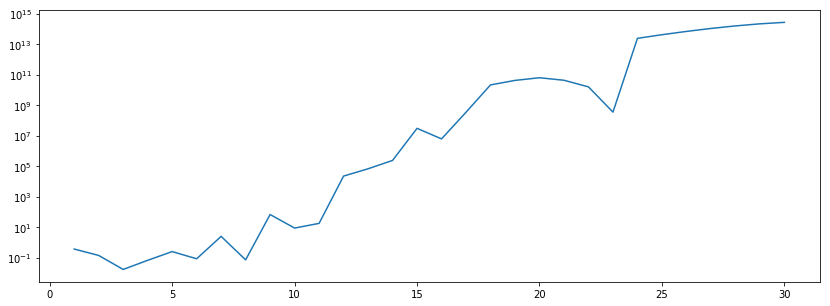

In [8]:
plot_mse_for_fn(degrees, true_fun, 30)

In [9]:
def true_fun_2(X):
    return np.exp(X)

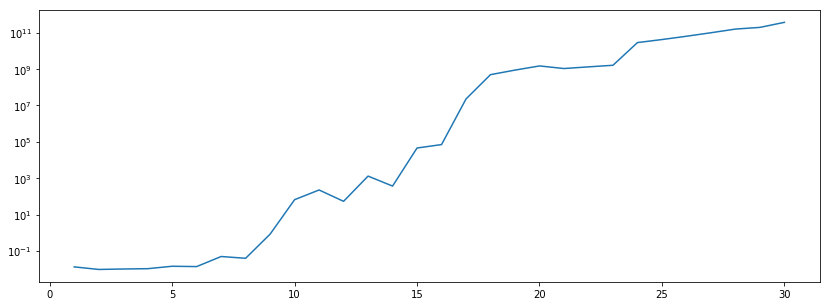

In [10]:
plot_mse_for_fn(degrees, true_fun_2, 30)